# <center> Two-sample test algorithm </center>

## Mathematical background

Changepoint detection problem may also be seen tackled using an hypothesis testing approach where one can compute sequentially a test statistic and construct a decision rule based on it to decide whether or not a changepoint has occurred (<a href="https://www.tandfonline.com/doi/abs/10.1080/00224065.2010.11917814">Hawkins and Deng (2010)</a>; <a href="https://www.tandfonline.com/doi/abs/10.1080/00224065.2005.11980297">Hawkins and Zamba (2005)</a>; <a href="https://www.tandfonline.com/doi/abs/10.1080/00224065.2003.11980233">Hawkins et al. (2003)</a>; <a href="https://www.tandfonline.com/doi/abs/10.1198/TECH.2011.10069">Ross et al. (2003)</a>; <a href="https://www.tandfonline.com/doi/abs/10.1080/00224065.2012.11917887">Ross and Adams (2012)</a>; <a href="https://link.springer.com/article/10.1007/s00362-007-0054-7">Zhou et al. (2009)</a>). The main advantage of these methods is that nonparametric tests can be used not to make any assumption on the distribution when in most applications it is unknown. This procedure can be split in two phases: a batch detection phase in which the algorithm would find changepoints in a fixed-length sequence, and a sequential detection phase which extends the first phase to sequences of infinite length. We will here first describe the batch detection phase in general without specifying any particular test statistic, then show how this method can be extended to sequential settings, and finally describe some two-sample test statistics that could be used in this method.

### Phase I: batch change detection

Let $x_1, x_2, ..., x_n$ be a fixed-length sequence containing $n$ observations, which may or may not contain a changepoint. We restrict here to the case in which at most one changepoint can occur. If no changepoint exists, observations $x_1, x_2, ..., x_n$ are independent and identically distributed according to some distribution $F_0$. If a changepoint exists at time $t = \tau$, then observations prior to time $\tau$ have a distribution $F_0$ and observations posterior to time $\tau$ have a distribution $F_1 \neq F_0$.

This leads to the following test hypotheses
$$
\begin{aligned}
H_0 ~ &: ~ X_i \sim F_0, ~ i = 1, 2, ..., n, \\
H_1 ~ &: ~ \exists k \in \{ 1, 2, ..., n \} \text{ such that } X_i \sim \left\{ \begin{array}{cl}
    F_0 & i = 1, 2, ..., k \\
    F_1 & i = k+1, k+2, ..., n
\end{array} \right. .
\end{aligned}
$$

This problem can be solved using nonparametric two-sample hypothesis testing. For example, the Mann-Whitney test would find changes in location, the Mood test would monitor changes in scale, the Lepage test would detect changes in both location and scale by combining Mann-Whitney and Mood statistics, the Kolmogorov-Smirnov and the Cramer-von-Mises tests would monitor general changes in distribution.

Therefore, one can choose a two-sample test statistic $D_{k, n}$, compute its value, and if $D_{k,n} > h_{k,n}$ for some appropriate threshold $h_{k,n}$ then the null hypothesis $H_0$ is rejected and one can conclude that a changepoint has occurred after observation $x_k$. However, we do not know in advance where the changepoint occurs as is it specified in the alternative hypothesis $H_1$ with \textit{there exists $k$}. Hence, $D_{k,n}$ must be evaluated for each $k$ which splits the sequence in two parts, that is $1 < k < n$, and the maximum value $D_n$ is used. In this way, a two-sample test is made at each possible split point. We hence use the test statistic
$$
D_n = \max_{k=2,...,n-1} D_{k,n} = \max_{k=2,...,n-1} \left| \frac{\tilde{D}_{k,n} - \mu_{\tilde{D}_{k,n}}}{\sigma_{\tilde{D}_{k,n}}} \right|,
$$
where $D_{k,n}$ is obtained by standardising the $\tilde{D}_{k,n}$ subtracting their means $\mu_{\tilde{D}_{k,n}}$ and dividing by their standard deviations $\sigma_{\tilde{D}_{k,n}}$ and taking the absolute value. This is done in order to detect both increases and decreases in the mean or the variance.

Then, the null hypothesis is rejected if $D_n > h_n$ for some appropriate threshold $h_n$ which can be chosen to bound to Type I error rate of the test. Assume that a significance level $\alpha$ is chosen, then $h_n$ should be set to the upper $\alpha$ quantile of the $D_n$ distribution under $H_0$. Therefore, in the case of rejecting the null hypothesis, the best estimate of the changepoint $\widehat{\tau}$ would be

$$
\widehat{\tau} = \operatorname{arg} \max_{k} D_{k,n}.
$$

### Phase II: sequential detection

The Phase I procedure can be extended to sequential changepoint detection where new observations are received over time and multiple changepoints can exist. Let $x_t$ denote the last observation, $t \in \{ 1, 2, ... \}$. Then the sequence $x_1, ..., x_t$ is processed and $D_t$ is computed as in Phase I. After comparing $D_t$ with the threshold $h_t$, if no change is detected ($D_t < h_t$), then a new observations $x_{t+1}$ is received and $D_{t+1}$ is computed and compared to $h_{t+1}$ and so on. In practice, this method cannot be used online since it would require to store all observations $x_1, ..., x_t$ for all $t$. However, the $D_{k,n}$ has most of the time properties that make the computation of $D_{t+1}$ not computationally expensive from $D_t$. 

In streaming data, $h_t$ is chosen so that the probability of Type I error is constant over time, that is under $H_0$

$$
\begin{aligned}
\mathbb{P}[D_1 > h_1] &= \alpha, \\
\mathbb{P}[D_t > h_t | D_{t-1} \leq h_{t-1}, ..., D_1 \leq h_1] &= \alpha, ~ t > 1.
\end{aligned}
$$

In average, the number of observations received before a false-positive detection happens is $\frac{1}{\alpha}$, which is equivalent to $ARL_0$. Computing thresholds $h_1, ..., h_t$ is in practice done using Monte Carlo simulations which approximate the statistic's distribution.

## Two-sample test in `ocpdet`

Install `ocpdet` package by running the command line: `pip install ocpdet` and import TwoSample as

In [1]:
from ocpdet import TwoSample

First, let's generate some artificial data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

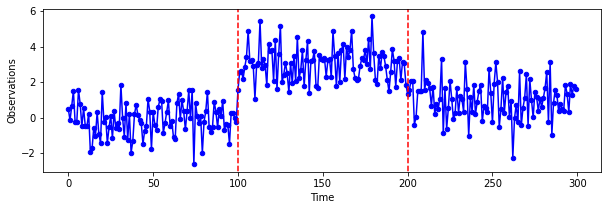

In [3]:
np.random.seed(42)

data = np.concatenate([
    np.random.normal(loc=0., scale=1., size=(100,)),
    np.random.normal(loc=3., scale=1., size=(100,)),
    np.random.normal(loc=1., scale=1., size=(100,)),
])

plt.figure(figsize=(10, 3))
plt.scatter(range(0, len(data)), data, c="b", s=20)
plt.plot(range(0, len(data)), data, c="b")
plt.xlabel("Time")
plt.ylabel("Observations")
plt.axvline(100, min(data), max(data), color="r", linestyle="--")
plt.axvline(200, min(data), max(data), color="r", linestyle="--")
plt.show()

TwoSample is implemented as a `Class` in `ocpdet` and it can be initialised such as

In [4]:
model = TwoSample(statistic="Lepage", threshold=3.1)

We can now process this data stream using the TwoSample object `model` that we created.

In [5]:
model.process(data)

We can now retrieve detected changepoints using the `changepoints` attribute of the `model` object.

In [6]:
model.changepoints

array([104, 205])

This isn't too bad as true changepoints occurred at times $t=100$ and $t=200$. The `TwoSample` object also brings flexibility and access to the algorithm statistic $D$ defined previously, using the `D` attribute of the object.

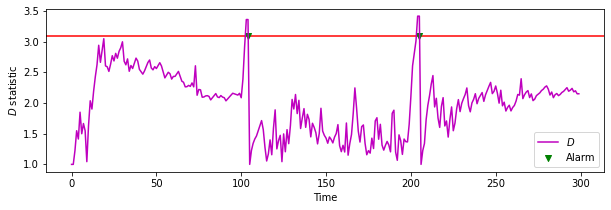

In [7]:
plt.figure(figsize=(10, 3))
plt.plot(range(0, len(data)), model.D, c="m", label="$D$")
plt.axhline(model.threshold, color="r", linestyle="-", zorder=-10)
plt.scatter(model.changepoints, len(model.changepoints) * [model.threshold], marker="v",
            label="Alarm", color="green")
plt.xlabel("Time")
plt.ylabel("$D$ statistic")
plt.legend()
plt.show()